In [ ]:
# ============================
# 1. Import thư viện
# ============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

# Thiết lập style cho seaborn
sns.set_style("whitegrid")

# Thư viện machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Sentence Embeddings
from sentence_transformers import SentenceTransformer

# Dùng cho Google Colab (nếu muốn tải file về)
from google.colab import files




Kích thước dữ liệu: (5574, 2)

5 dòng đầu:
                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0

Phân phối nhãn:
label
0    4827
1     747
Name: count, dtype: int64


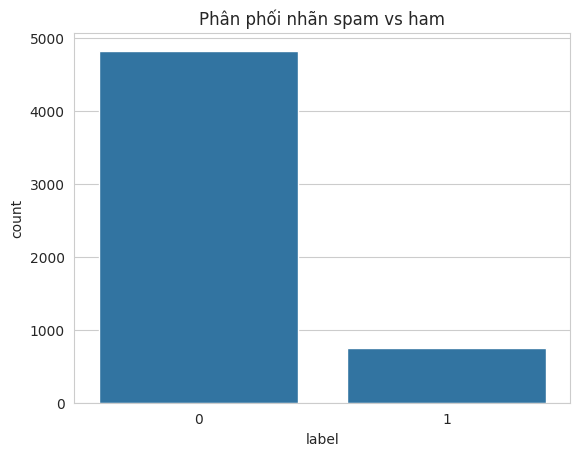


Độ dài trung bình tin nhắn spam: 139.6760374832664
Độ dài trung bình tin nhắn ham: 72.47192873420344


In [ ]:
# ============================
# 2. Khám phá dữ liệu
# ============================
df = pd.read_csv("train.csv")

print("Kích thước dữ liệu:", df.shape)
print("\n5 dòng đầu:")
print(df.head())

print("\nPhân phối nhãn:")
print(df['label'].value_counts())

# Trực quan hóa phân phối nhãn
sns.countplot(x='label', data=df)
plt.title("Phân phối nhãn spam vs ham")
plt.show()

# Độ dài trung bình tin nhắn
df['text_len'] = df['sms'].apply(len)
print("\nĐộ dài trung bình tin nhắn spam:", df[df['label']==1]['text_len'].mean())
print("Độ dài trung bình tin nhắn ham:", df[df['label']==0]['text_len'].mean())


In [ ]:
# ============================
# 3. Tiền xử lý văn bản
# ============================
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # bỏ ký tự đặc biệt, số
    text = re.sub(r'\s+', ' ', text).strip()  # bỏ khoảng trắng thừa
    return text

df['clean_sms'] = df['sms'].apply(clean_text)

X = df['clean_sms']
y = df['label']


In [ ]:
# ============================
# 4. Chia tập train/test
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# ============================
# 5. Vector hóa
# ============================

# BoW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# ============================
# 6. Huấn luyện mô hình (BoW, TF-IDF)
# ============================

# --- Naive Bayes với BoW ---
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_bow.predict(X_test_bow)

print("=== Naive Bayes (BoW) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bow))

# --- Naive Bayes với TF-IDF ---
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("\n=== Naive Bayes (TF-IDF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))



=== Naive Bayes (BoW) ===
Accuracy: 0.9802690582959641

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


=== Naive Bayes (TF-IDF) ===
Accuracy: 0.9560538116591928

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [ ]:
# ============================
# 7. Sentence Embeddings
# ============================
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_emb = sbert_model.encode(X_train.tolist())
X_test_emb = sbert_model.encode(X_test.tolist())

emb_model = LogisticRegression(max_iter=1000)
emb_model.fit(X_train_emb, y_train)

y_pred_emb = emb_model.predict(X_test_emb)

print("=== Sentence Embeddings + Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_emb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_emb))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# ============================
# 8. So sánh kết quả mô hình
# ============================
results = {
    "Bag-of-Words": accuracy_score(y_test, y_pred_bow),
    "TF-IDF": accuracy_score(y_test, y_pred_tfidf),
    "Sentence Embeddings": accuracy_score(y_test, y_pred_emb)
}

print("Kết quả các mô hình:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


Kết quả các mô hình:
Bag-of-Words: 0.9803
TF-IDF: 0.9561
Sentence Embeddings: 0.9650


In [ ]:
# ============================
# 9. Tạo file submission
# ============================
test = pd.read_csv("test.csv")

# Chọn mô hình tốt nhất
best_model_name = max(results, key=results.get)
print(f"➡️ Mô hình tốt nhất: {best_model_name}")

if best_model_name == "Bag-of-Words":
    X_test_final = bow_vectorizer.transform(test['sms'])
    final_preds = nb_bow.predict(X_test_final)

elif best_model_name == "TF-IDF":
    X_test_final = tfidf_vectorizer.transform(test['sms'])
    final_preds = nb_tfidf.predict(X_test_final)

else:  # Sentence Embeddings
    X_test_final = sbert_model.encode(test['sms'].tolist())
    final_preds = emb_model.predict(X_test_final)

# Xuất submission
submission = pd.DataFrame({
    "id": test["id"],
    "label": final_preds
})
submission.to_csv("submission.csv", index=False)
print("\n✅ File submission.csv đã được tạo!")
submission.head()


➡️ Mô hình tốt nhất: Bag-of-Words

✅ File submission.csv đã được tạo!


,id,label
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
